In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import mode
from tqdm.notebook import tqdm
from p_tqdm import p_map

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [73]:
df_ranking = pd.read_csv('../../search_results/LOPQ+Both+resnet18+256+20_ranking_top20_alg.csv', index_col=None)

In [74]:
df_ranking

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Ph1_P0001_D01_S001_C4_az020,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0066_D01_S001,0081_D01_S001,0192_D01_S001,0684_D01_S001,...,0398_D01_S001,0449_D01_S001,0449_D01_S001,0005_D01_S001,0236_D01_S001,0398_D01_S001,0180_D01_S001,0379_D02_S002,0042_D01_S001,0379_D02_S001
1,Ph1_P0001_D01_S001_C4_az040,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0180_D01_S001,0015_D01_S001,0066_D01_S001,0684_D01_S001,...,0398_D01_S001,0236_D01_S001,0449_D01_S001,0005_D01_S001,0236_D01_S001,0379_D02_S002,0379_D01_S001,0379_D02_S001,0101_D01_S001,0398_D01_S001
2,Ph1_P0001_D01_S001_C4_az060,0001_D01_S001,0192_D01_S001,0001_D01_S001,0684_D01_S001,0192_D01_S001,0379_D02_S001,0015_D01_S001,0801_D01_S001,0449_D01_S001,...,0083_D01_S001,0236_D01_S001,0001_D01_S001,0016_D01_S001,0807_D01_S001,0066_D01_S001,0008_D01_S001,0081_D01_S001,0777_D01_S001,0429_D01_S001
3,Ph1_P0001_D01_S001_C4_az080,0001_D01_S001,0001_D01_S001,0192_D01_S001,0192_D01_S001,0001_D01_S001,0012_D01_S001,0449_D01_S001,0048_D01_S001,0684_D01_S001,...,0015_D01_S001,0005_D01_S001,0083_D01_S001,0015_D01_S001,0236_D01_S001,0081_D01_S001,0449_D01_S001,0429_D01_S001,0398_D01_S001,0037_D01_S002
4,Ph1_P0001_D01_S001_C4_az100,0001_D01_S001,0001_D01_S001,0001_D01_S001,0398_D01_S001,0192_D01_S001,0449_D01_S001,0449_D01_S001,0083_D01_S001,0684_D01_S001,...,0192_D01_S001,0005_D01_S001,0236_D01_S001,0015_D01_S001,0101_D01_S001,0429_D01_S001,0379_D01_S001,0026_D01_S003,0201_D01_S001,0037_D02_S002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50986,Ph3_P0898_D01_S001_C2_az260,0898_D01_S001,0898_D01_S001,0898_D01_S001,0223_D02_S001,0151_D01_S001,0737_D01_S001,0741_D01_S001,0740_D01_S001,0737_D01_S001,...,0741_D01_S001,0740_D01_S001,0151_D01_S001,0123_D01_S001,0122_D01_S001,0500_D01_S001,0142_D01_S001,0134_D01_S001,0277_D01_S001,0488_D01_S001
50987,Ph3_P0898_D01_S001_C2_az280,0898_D01_S001,0898_D01_S001,0898_D01_S001,0134_D01_S001,0741_D01_S001,0021_D01_S001,0155_D01_S001,0324_D01_S001,0151_D01_S001,...,0740_D01_S001,0681_D01_S001,0680_D01_S001,0123_D01_S001,0151_D01_S001,0409_D01_S001,0122_D01_S001,0500_D01_S001,0775_D01_S001,0134_D01_S001
50988,Ph3_P0898_D01_S001_C2_az300,0898_D01_S001,0898_D01_S001,0898_D01_S001,0798_D01_S001,0741_D01_S001,0813_D01_S001,0680_D01_S001,0737_D01_S001,0155_D01_S001,...,0680_D01_S001,0844_D01_S001,0151_D01_S001,0151_D01_S001,0122_D01_S001,0737_D01_S001,0141_D01_S001,0123_D01_S001,0277_D01_S001,0311_D01_S001
50989,Ph3_P0898_D01_S001_C2_az320,0898_D01_S001,0898_D01_S001,0898_D01_S001,0534_D01_S001,0741_D01_S001,0737_D01_S001,0151_D01_S001,0798_D01_S001,0155_D01_S001,...,0680_D01_S001,0680_D01_S001,0151_D01_S001,0500_D01_S001,0122_D01_S001,0134_D01_S001,0142_D01_S001,0491_D01_S005,0141_D01_S001,0488_D01_S001


In [75]:
cs = df_ranking.columns[2:].to_list()
pc = dict((zip(cs, [f"package_{i}" for i, c in enumerate(cs, start=1)])))
df_ranking.rename(columns=dict({'0': 'sample_actual', '1': 'package_actual'}, **pc), inplace=True)
excluded_classes = ['0235_D01_S001', '0200_D01_S001', '0049_D01_S001', '0842_D01_S001', '0337_D01_S001', '0263_D01_S001', '0735_D01_S001', '0541_D01_S001', '0311_D01_S001']
len(excluded_classes)
df_ranking = df_ranking[~df_ranking.package_actual.isin(excluded_classes)]
df_ranking.package_actual.nunique()

9

989

In [78]:
guesses_list = list(range(1, len(cs) + 1))

In [79]:
for guess in guesses_list:
    df_ranking[f'guess_{guess}'] = df_ranking['package_actual'] == df_ranking[f'package_{guess}']

<ipython-input-79-f69aaac01103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranking[f'guess_{guess}'] = df_ranking['package_actual'] == df_ranking[f'package_{guess}']


In [80]:
total = df_ranking.shape[0]
total

50485

In [81]:
guess_columns = [c for c in df_ranking.columns if c.startswith('guess_')]
probability_of_miss = list()

for top in guesses_list:
    df_ranking[f"top_{top}"] = df_ranking[guess_columns[:top]].any(axis=1)
    probability_of_miss.append(1 - df_ranking[f"top_{top}"].value_counts()[True] / total)

<ipython-input-81-6aead8c5b819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranking[f"top_{top}"] = df_ranking[guess_columns[:top]].any(axis=1)


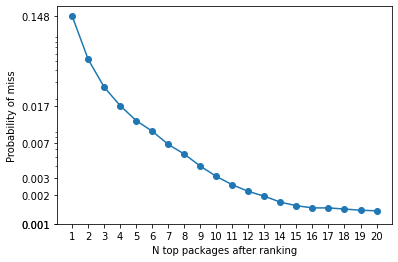

In [82]:
p1 = plt.plot(probability_of_miss, 'o-', label='Class and distinct')
#plt.figure(figsize=(8,8))
# plt.legend([p1], labels=['Class and distinct'])
plt.yscale('log')
plt.xticks(np.arange(len(guesses_list)), guesses_list)
rounded = np.around(probability_of_miss[::3], 3)
plt.yticks(rounded, rounded)
plt.xlabel('N top packages after ranking')
plt.ylabel('Probability of miss')
plt.savefig(f'top_{len(cs)}.png')

In [83]:
probability_of_miss[-1] * total

68.9999999999988

In [84]:
probability_of_miss[-1]

0.0013667425968109104

In [61]:
df_ranking[df_ranking.top_30 == False].sample_actual.to_csv('to_investigate.csv', index=False)

In [85]:
df_ranking

,sample_actual,package_actual,package_1,package_2,package_3,package_4,package_5,package_6,package_7,package_8,...,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
0,Ph1_P0001_D01_S001_C4_az020,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0066_D01_S001,0081_D01_S001,0192_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
1,Ph1_P0001_D01_S001_C4_az040,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0180_D01_S001,0015_D01_S001,0066_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
2,Ph1_P0001_D01_S001_C4_az060,0001_D01_S001,0192_D01_S001,0001_D01_S001,0684_D01_S001,0192_D01_S001,0379_D02_S001,0015_D01_S001,0801_D01_S001,0449_D01_S001,...,True,True,True,True,True,True,True,True,True,True
3,Ph1_P0001_D01_S001_C4_az080,0001_D01_S001,0001_D01_S001,0192_D01_S001,0192_D01_S001,0001_D01_S001,0012_D01_S001,0449_D01_S001,0048_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
4,Ph1_P0001_D01_S001_C4_az100,0001_D01_S001,0001_D01_S001,0001_D01_S001,0398_D01_S001,0192_D01_S001,0449_D01_S001,0449_D01_S001,0083_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50986,Ph3_P0898_D01_S001_C2_az260,0898_D01_S001,0898_D01_S001,0898_D01_S001,0223_D02_S001,0151_D01_S001,0737_D01_S001,0741_D01_S001,0740_D01_S001,0737_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50987,Ph3_P0898_D01_S001_C2_az280,0898_D01_S001,0898_D01_S001,0898_D01_S001,0134_D01_S001,0741_D01_S001,0021_D01_S001,0155_D01_S001,0324_D01_S001,0151_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50988,Ph3_P0898_D01_S001_C2_az300,0898_D01_S001,0898_D01_S001,0898_D01_S001,0798_D01_S001,0741_D01_S001,0813_D01_S001,0680_D01_S001,0737_D01_S001,0155_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50989,Ph3_P0898_D01_S001_C2_az320,0898_D01_S001,0898_D01_S001,0898_D01_S001,0534_D01_S001,0741_D01_S001,0737_D01_S001,0151_D01_S001,0798_D01_S001,0155_D01_S001,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
fill_value = 100
dfsingle = dfs[0]

sample_actual = dfsingle.iloc[0].sample_actual
package_actual = dfsingle.iloc[0].package_actual
package_actual_ns = dfsingle.iloc[0].package_actual[:-5]

In [ ]:
df_piv = dfsingle.pivot_table(
    index='package_predicted', columns='descriptor_actual', values='distance', fill_value=np.nan,
    aggfunc=[np.mean, np.median, 'count', sum, np.std, np.var])
#df_piv = df_piv.swaplevel(axis='columns')
df_piv = df_piv.reset_index()

In [ ]:
df_piv

In [ ]:
df_rank = pd.DataFrame(columns=df_piv.columns)

In [ ]:
rank_ascending = ['mean', 'median', 'sum', 'std', 'var']
rank_descending = ['count']

df_rank.loc[:, rank_ascending] = df_piv[rank_ascending].rank(method='dense', na_option='bottom', ascending=True)
df_rank.loc[:, rank_descending] = df_piv[rank_descending].rank(method='dense', na_option='bottom', ascending=False)
df_rank['index'] = df_piv['index']

guess_rankings = dict()

for desc_index in df_piv.columns.levels[1].to_list()[:-1]:
    df_rank.loc[:, ('rank_sum', desc_index)] = df_rank.loc[:, (rank_ascending + rank_descending, desc_index)].sum(axis=1)
    guesses = df_rank.loc[df_rank.loc[:, ('rank_sum', desc_index)].nsmallest(5).index, 'index'].to_list()
    
    for rank, guess in enumerate(guesses, start=1):
        if guess in guess_rankings.keys():
            guess_rankings[guess].append(rank)
        else:
            guess_rankings[guess] = [rank]
top_guesses = [s[0] for s in sorted(guess_rankings.items(), key=lambda x: len(x[1]), reverse=True)][:5]

In [ ]:
package_actual == top_guesses